1.Create a new column age_category that categorizes people into ‘Young’ (0-35 years), ‘Middle-aged’ (36-60 years), and ‘Senior’ (61+ years) using the apply function.

In [39]:
#IMPORT REFRENCE FROM LIBRARY#
import pandas as pd
import sys


In [40]:
df = pd.read_csv("C:\\Users\\Bayu\\anaconda3\\Lib\\site-packages\\pandas\\io\\parsers\\healtcare_stroke_data.csv")

<Axes: >

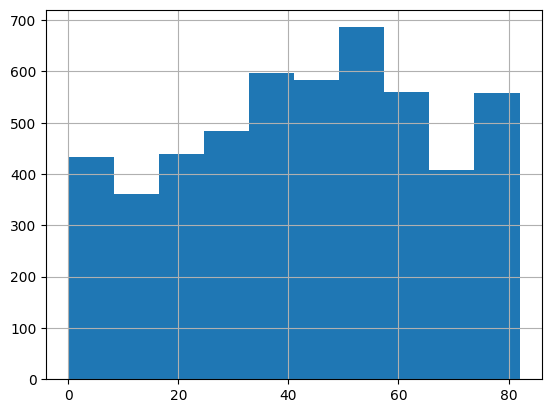

In [41]:
df['age'].hist()

In [42]:
def segment_age(value) : 
    if value <=35:
        segment = 'young age'
    elif value <=60 : 
        segment = 'middle age'
    else :
        segment = 'senior'
    return segment
 

In [43]:
column = ['id','age','segment_age']
df['segment_age'] = df['age'].apply(segment_age)
df[column]

,id,age,segment_age
0,9046,67.0,senior
1,51676,61.0,senior
2,31112,80.0,senior
3,60182,49.0,middle age
4,1665,79.0,senior
...,...,...,...
5105,18234,80.0,senior
5106,44873,81.0,senior
5107,19723,35.0,young age
5108,37544,51.0,middle age


In [44]:
df[column].groupby('segment_age')[['id']].count()

,id
segment_age,
middle age,1907
senior,1304
young age,1899


2. Calculate the total number of people in each Residence_type (Urban and Rural) and store the results in a dictionary.

In [45]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,segment_age
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,senior
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,senior
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,senior
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,middle age
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,senior


In [46]:
df['Residence_type'].value_counts()


Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

In [47]:
#dictionary to store totals
total_population =  df.groupby("Residence_type").size().to_dict()

In [48]:
print("Total Population by Residence_type:")
print(total_population)

Total Population by Residence_type:
{'Rural': 2514, 'Urban': 2596}


3.Using the apply function, create a new column stroke_risk that is ‘High’ if a person has both hypertension and an average glucose level above 150, and ‘Low’ otherwise.

<Axes: >

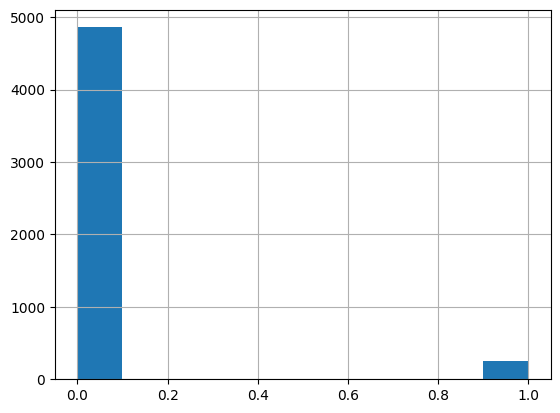

In [49]:
df['stroke'].hist()

In [50]:
def stroke_risk(row) : 
    if row['hypertension'] == 1 and row['avg_glucose_level'] > 150:
        return 'High'
    else :
        return 'Low'

In [51]:
column = ['id','hypertension','avg_glucose_level', 'stroke_risk']
df['stroke_risk'] = df.apply(stroke_risk, axis=1)
df[column]

,id,hypertension,avg_glucose_level,stroke_risk
0,9046,0,228.69,Low
1,51676,0,202.21,Low
2,31112,0,105.92,Low
3,60182,0,171.23,Low
4,1665,1,174.12,High
...,...,...,...,...
5105,18234,1,83.75,Low
5106,44873,0,125.20,Low
5107,19723,0,82.99,Low
5108,37544,0,166.29,Low


In [52]:
df[column].groupby('stroke_risk')[['id']].count()

,id
stroke_risk,
High,175
Low,4935


4. Using a loop, identify and print out the id of individuals who are over 60 years old, have a BMI less than 25, and have never smoked.

In [53]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,segment_age,stroke_risk
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,senior,Low
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,senior,Low
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,senior,Low
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,middle age,Low
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,senior,High


In [59]:
filtered_df = df[(df['age'] > 60) & (df['bmi'] < 25) & (df['smoking_status'] == 'never smoked')]
for id_value in filtered_df['id']:
    print(f"ID: {id_value} matches the criteria!")

ID: 1665 matches the criteria!
ID: 10434 matches the criteria!
ID: 70822 matches the criteria!
ID: 39373 matches the criteria!
ID: 55927 matches the criteria!
ID: 17013 matches the criteria!
ID: 26727 matches the criteria!
ID: 30456 matches the criteria!
ID: 16817 matches the criteria!
ID: 8045 matches the criteria!
ID: 62861 matches the criteria!
ID: 37060 matches the criteria!
ID: 2548 matches the criteria!
ID: 10552 matches the criteria!
ID: 56357 matches the criteria!
ID: 61837 matches the criteria!
ID: 37031 matches the criteria!
ID: 20546 matches the criteria!
ID: 55424 matches the criteria!
ID: 44300 matches the criteria!
ID: 33528 matches the criteria!
ID: 71010 matches the criteria!
ID: 53010 matches the criteria!
ID: 57879 matches the criteria!
ID: 19681 matches the criteria!
ID: 42550 matches the criteria!
ID: 62756 matches the criteria!
ID: 34728 matches the criteria!
ID: 69177 matches the criteria!
ID: 62284 matches the criteria!
ID: 22488 matches the criteria!
ID: 43905 m

5. Create a new column glucose_level_status that categorizes the average glucose level into ‘Normal’ (<= 100), ‘Prediabetes’ (100-125), and ‘Diabetes’ (> 125) using the apply function

<Axes: >

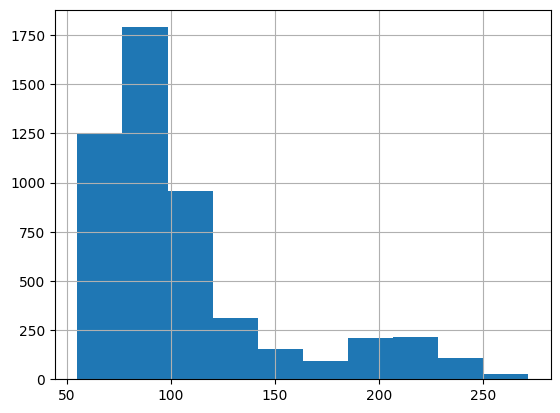

In [55]:
df['avg_glucose_level'].hist()

In [56]:
def glucose_level(value) : 
    if value <=100:
        segment = 'Normal'
    elif value <=125 : 
        segment = 'Prediabetes'
    else :
        segment = 'Diabetes'
    return segment

In [57]:
column = ['id','avg_glucose_level','glucose_level']
df['glucose_level'] = df['avg_glucose_level'].apply(glucose_level)
df[column]

,id,avg_glucose_level,glucose_level
0,9046,228.69,Diabetes
1,51676,202.21,Diabetes
2,31112,105.92,Prediabetes
3,60182,171.23,Diabetes
4,1665,174.12,Diabetes
...,...,...,...
5105,18234,83.75,Normal
5106,44873,125.20,Diabetes
5107,19723,82.99,Normal
5108,37544,166.29,Diabetes


In [58]:
df[column].groupby('glucose_level')[['id']].count()

,id
glucose_level,
Diabetes,1000
Normal,3131
Prediabetes,979
